In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib as plt
from matplotlib import pyplot
!pip install geopandas
import geopandas
! pip install pycountry
import pycountry 
!pip install contextily
import contextily as ctx


     |████████████████████████████████| 972kB 7.6MB/s 
     |████████████████████████████████| 6.5MB 15.8MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 
     |████████████████████████████████| 10.1MB 8.1MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=1ec5b5e0a1822f3da49f9686d86a5f5dddb4dbbb4571e9b35de3d86d22fd831b
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 19.1MB 1.2MB/s 


In [2]:
boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))
print(boros)


   BoroCode  ...                                           geometry
0         5  ...  MULTIPOLYGON (((970217.022 145643.332, 970227....
1         4  ...  MULTIPOLYGON (((1029606.077 156073.814, 102957...
2         3  ...  MULTIPOLYGON (((1021176.479 151374.797, 102100...
3         1  ...  MULTIPOLYGON (((981219.056 188655.316, 980940....
4         2  ...  MULTIPOLYGON (((1012821.806 229228.265, 101278...

[5 rows x 5 columns]


In [ ]:
boros.BoroName

# boro_locations = geopandas.tools.geocode(boros.BoroName)

# boro_locations

img = plt.pyplot.imread("nyc_map.png")
fig, ax = plt.pyplot.subplots(figsize=(15,15))
ax.imshow(img)
# boros = boros.to_crs(epsg=3857)
# base = boros.plot(ax=ax, alpha=0.5, edgecolor='k');


# base = boros.to_crs("EPSG:4326").plot(ax=ax, color="white",   edgecolor='k');
# ctx.add_basemap(ax, zoom=0)

# n = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']
# x = [-74.0,     -73.985,    -73.97,  -73.96]
# y = [40.705,     40.71,     40.72,    40.75]
# s = [150,        100,       100,      100]

bb = ax.scatter(500,    550, color='red',     marker='>', s=200, label='Brooklyn Bridge')
mb = ax.scatter(515,    535, color='yellow',   marker='<', s=200, label='Manhattan Bridge')
wb = ax.scatter(555,    512, color='magenta',  marker='v', s=200, label='Williamsburg Bridge')
qb = ax.scatter(580,    410, color='blue',    marker='v', s=200, label='Queensboro Bridge')

# base.scatter(x,y, s=s, color=['red','green','yellow','blue'])
ax.legend()
ax.grid(True)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (x[i], y[i]))
# boro_locations.plot(ax=ax, color="red");

In [ ]:
# streets = geopandas.read_file('SimplifiedStreets_shp')

In [ ]:
boros.BoroName

# boro_locations = geopandas.tools.geocode(boros.BoroName)

# boro_locations
fig, ax = plt.pyplot.subplots(figsize=(20,20))

boros = boros.to_crs(epsg=3857)
base = boros.plot(ax=ax, alpha=0.5, edgecolor='k');


# base = boros.to_crs("EPSG:4326").plot(ax=ax, color="white",   edgecolor='k');
ctx.add_basemap(ax)

# n = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']
# x = [-74.0,     -73.985,    -73.97,  -73.96]
# y = [40.705,     40.71,     40.72,    40.75]
# s = [150,        100,       100,      100]

# bb = base.scatter(-74.0,    40.705, color='red',    s=150, label='Brooklyn Bridge')
# mb = base.scatter(-73.985,  40.71, color='green',   s=150, label='Manhattan Bridge')
# wb = base.scatter(-73.97,   40.72, color='yellow',  s=150, label='Williamsburg Bridge')
# qb = base.scatter(-73.96,   40.75, color='blue',    s=150, label='Queensboro Bridge')



# base.scatter(x,y, s=s, color=['red','green','yellow','blue'])
# ax.legend()
# ax.grid(True)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (x[i], y[i]))
# boro_locations.plot(ax=ax, color="red");

In [5]:
df = pd.read_csv('nyc-bicycle-counts.csv')
df.head()


,Index,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.0,1416,2617,3081,2357,9471
1,5,4/6/2016 0:00,4/6/2016 0:00,45.0,30.0,0.0,1885,3329,3856,2849,11919
2,9,4/10/2016 0:00,4/10/2016 0:00,48.9,30.9,0.0,1447,2387,3132,2160,9126
3,12,4/13/2016 0:00,4/13/2016 0:00,57.0,39.9,0.0,2840,5395,5995,4192,18422
4,13,4/14/2016 0:00,4/14/2016 0:00,62.1,44.6,0.0,2861,5309,6030,4115,18315


In [6]:
df.shape

(210, 11)

In [7]:
df['High Temp (°F)'].corr(df['Total'])

0.7433437005618655

Text(0, 0.5, 'Total')

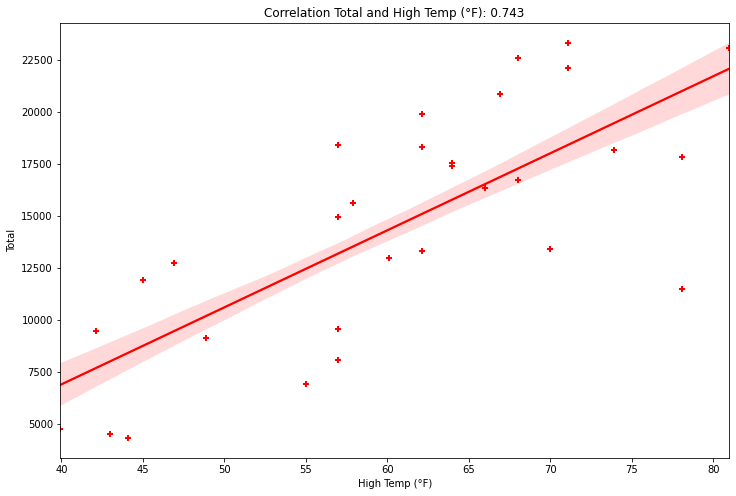

In [8]:
a_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a_dims)
ax = plt.pyplot.gca()
ax.set_title("Correlation Total and High Temp (°F): " +str( round(df['High Temp (°F)'].corr(df['Total']) ,3)) )
sns.regplot(data=df, x="High Temp (°F)", y="Total", marker="+", color="red")
ax.set_ylabel("Total")

Text(0, 0.5, 'Total')

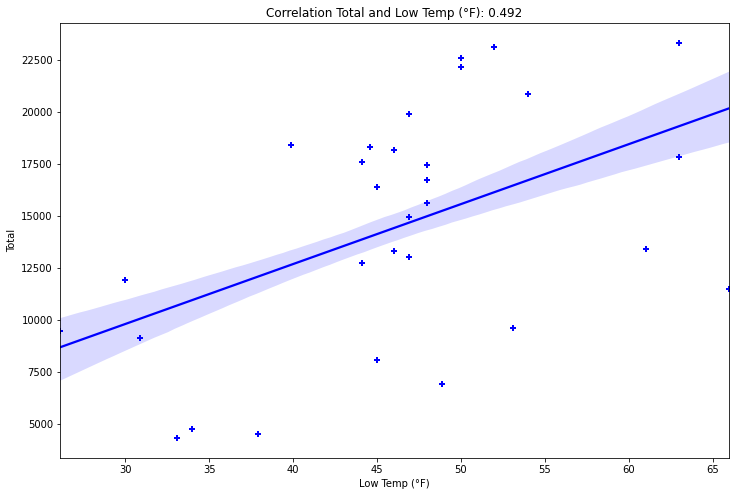

In [9]:
df['Low Temp (°F)'].corr(df['Total'])
a_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a_dims)
ax = plt.pyplot.gca()
ax.set_title("Correlation Total and Low Temp (°F): " +str( round(df['Low Temp (°F)'].corr(df['Total']) ,3)) )
sns.regplot(data=df, x="Low Temp (°F)", y="Total", marker="+", color="blue")
ax.set_ylabel("Total")

Text(0, 0.5, 'Total')

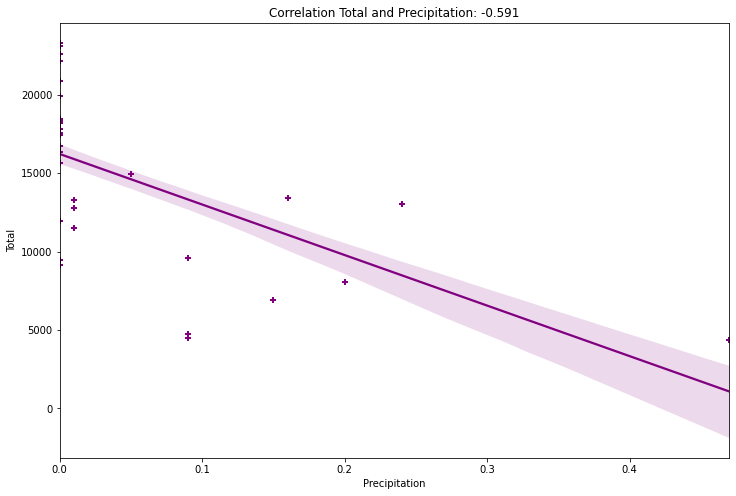

In [11]:
df['Precipitation'] = df['Precipitation'].astype(float)
df['Precipitation'].corr(df['Total'])
a_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a_dims)
ax = plt.pyplot.gca()
ax.set_title("Correlation Total and Precipitation: " +str( round(df['Precipitation'].corr(df['Total']) ,3)) )
sns.regplot(data=df, x="Precipitation", y="Total", marker="+", color="purple")
ax.set_ylabel("Total")

In [12]:
df = pd.read_csv('nyc-bicycle-counts.csv')


In [13]:
df['bridgeName'] = df[['Brooklyn Bridge',	'Manhattan Bridge',	'Williamsburg Bridge',	'Queensboro Bridge']].idxmax(axis=1)
df.head()


,Index,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,bridgeName
0,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.0,1416,2617,3081,2357,9471,Williamsburg Bridge
1,5,4/6/2016 0:00,4/6/2016 0:00,45.0,30.0,0.0,1885,3329,3856,2849,11919,Williamsburg Bridge
2,9,4/10/2016 0:00,4/10/2016 0:00,48.9,30.9,0.0,1447,2387,3132,2160,9126,Williamsburg Bridge
3,12,4/13/2016 0:00,4/13/2016 0:00,57.0,39.9,0.0,2840,5395,5995,4192,18422,Williamsburg Bridge
4,13,4/14/2016 0:00,4/14/2016 0:00,62.1,44.6,0.0,2861,5309,6030,4115,18315,Williamsburg Bridge


In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[['High Temp (°F)','Low Temp (°F)',	'Precipitation']], df['bridgeName'], test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


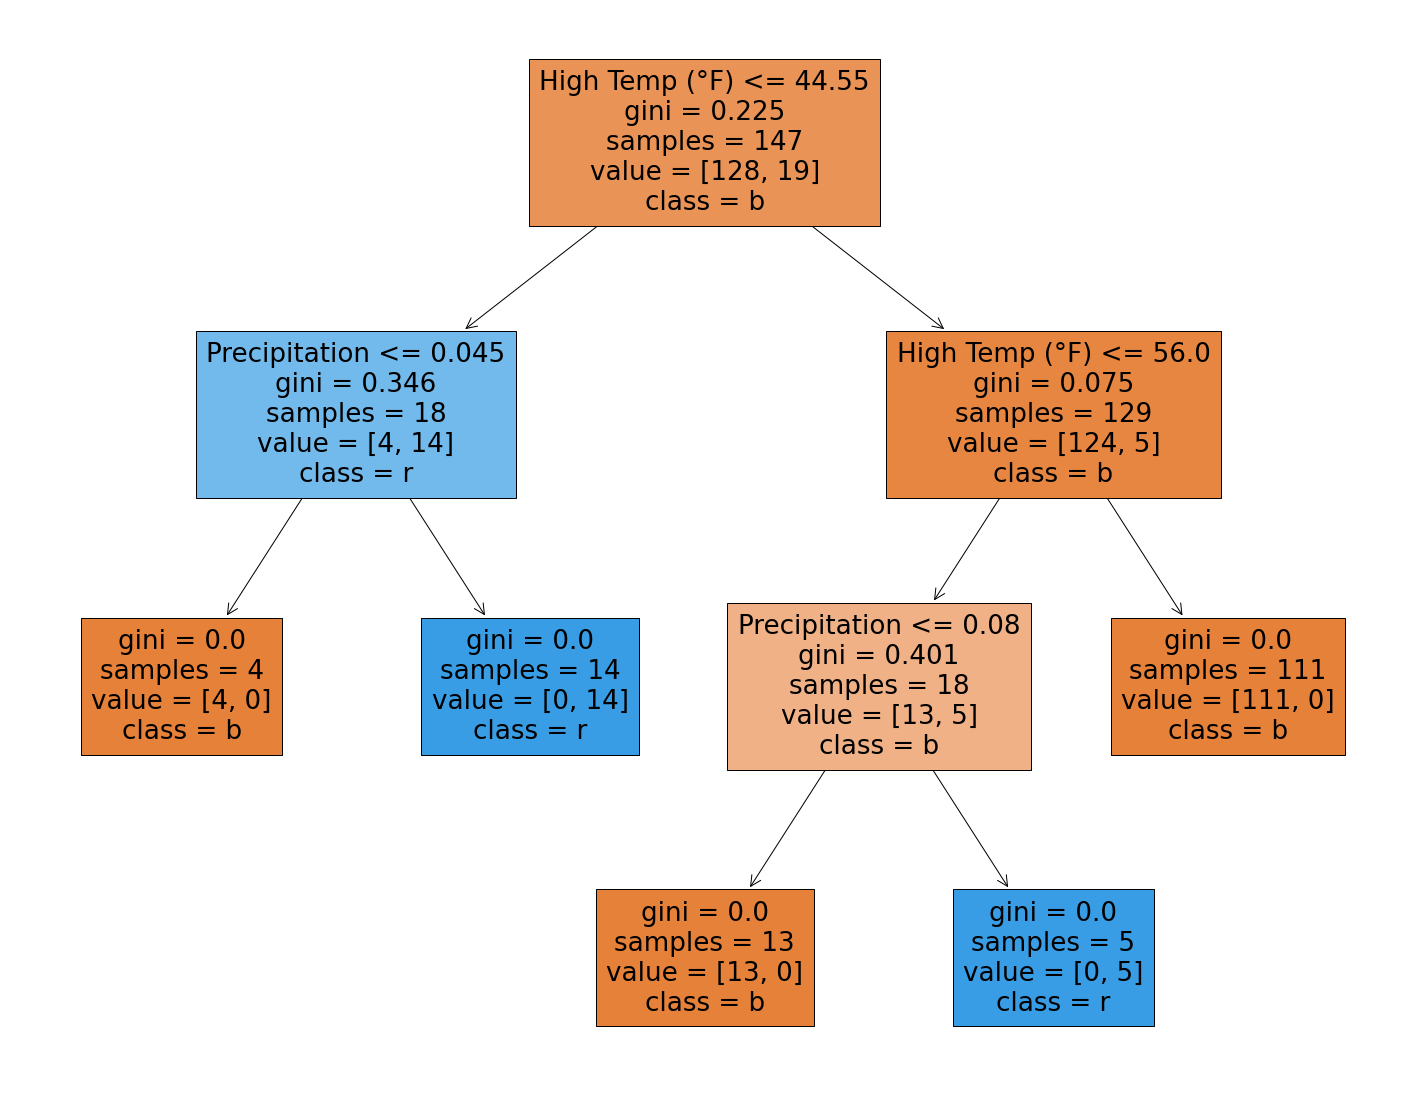

In [23]:
from sklearn import tree
fig = pyplot.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names='bridgeName',
                   filled=True)

In [24]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 44.55
|   |--- feature_2 <= 0.05
|   |   |--- class: Manhattan Bridge
|   |--- feature_2 >  0.05
|   |   |--- class: Queensboro Bridge
|--- feature_0 >  44.55
|   |--- feature_0 <= 56.00
|   |   |--- feature_2 <= 0.08
|   |   |   |--- class: Manhattan Bridge
|   |   |--- feature_2 >  0.08
|   |   |   |--- class: Queensboro Bridge
|   |--- feature_0 >  56.00
|   |   |--- class: Manhattan Bridge



In [21]:
df['bridgeName'] = df[['Brooklyn Bridge',	'Manhattan Bridge',	'Queensboro Bridge']].idxmax(axis=1)
df.head()

,Index,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,bridgeName
0,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.0,1416,2617,3081,2357,9471,Manhattan Bridge
1,5,4/6/2016 0:00,4/6/2016 0:00,45.0,30.0,0.0,1885,3329,3856,2849,11919,Manhattan Bridge
2,9,4/10/2016 0:00,4/10/2016 0:00,48.9,30.9,0.0,1447,2387,3132,2160,9126,Manhattan Bridge
3,12,4/13/2016 0:00,4/13/2016 0:00,57.0,39.9,0.0,2840,5395,5995,4192,18422,Manhattan Bridge
4,13,4/14/2016 0:00,4/14/2016 0:00,62.1,44.6,0.0,2861,5309,6030,4115,18315,Manhattan Bridge
